Here, relating the pseudocode to $c, z$ and $f_{c}$:
$ \\
    f_c(z) = z^2 + c \\
    z = x + {\rm i}y \\
    z^2 = x^2 + 2{\rm i}xy - y^2
    c = x_0 + {\rm i}y_0
$

and so, as can be seen in the pseudocode in the computation of $x$ and $y$:
$ \\
x = \mathrm{Re}(z^2 + c) = x^2 - y^2 + x_0  \\
y = \mathrm{Im}(z^2 + c) = 2xy + y_0  \\
$

To get colorful images of the set, the assignment of a color to each value of the number of executed iterations can be made using one of a variety of functions (linear, exponential, etc.).

# Pseudocode

for each pixel (Px, Py) on the screen do 
    x0 := scaled x coordinate of pixel (scaled to lie in the Mandelbrot X scale (-2.00, 0.47))  
    y0 := scaled y coordinate of pixel (scaled to lie in the Mandelbrot Y scale (-1.12, 1.12))  
    x := 0.0  
    y := 0.0  
    iteration := 0  
    max_iteration := 1000  
    while (x^2 + y^2 ≤ 2^2 AND iteration < max_iteration) do  
        xtemp := x^2 - y^2 + x0  
        y := 2*x*y + y0 
        x := xtemp 
        iteration := iteration + 1 

color := palette[iteration]  
plot(Px, Py, color) 

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import threading
import os

from queue import Queue
import threading


dir_path = os.path.abspath('')+'\\segments2\\'
print(dir_path)
dir_path_results = os.path.abspath('')+'\\results\\'

d:\Programming\MandelbrotJupyter\segments2\


In [110]:
def worker(resultMatrix, indX, indY, Px, Py, max_iteration):
    x, y = 0, 0
    iteration = 0
    #max_iteration = 1000
    while np.any((x*x + y*y) <= 4) and np.any(iteration < max_iteration):
        xtemp = x*x - y*y + Px
        y = 2*x*y + Py
        x = xtemp 
        iteration += 1
    
    #print(iteration)
    resultMatrix[indX, indY] = iteration
    #return iteration
    
def runMandelbrot(resultMatrix, M_sez, N_sez, max_iteration):
    #queue = Queue()
    
    # Lock for thread-safe access to the results array
    lock = threading.Lock()
    
    threads = []
    
    for indX, M in enumerate(M_sez):
        for indY, N in enumerate(N_sez):
            #print(M, N)
            thread = threading.Thread(target=worker, 
                args=(resultMatrix, indX, indY, M, N, max_iteration))
            threads.append(thread)

    for thread in threads:
        thread.start()

    for thread in threads:
        thread.join()
        
    return resultMatrix


def write_csv(matrix, filepath):
    np.savetxt(filepath, matrix, delimiter=',')#, fmt='%s')


def main_func(height, width, splits, max_iteration):
    global dir_path
    
    x_min, x_max = -2.0, 0.47
    y_min, y_max = -1.12, 1.12
    
    x_step = (x_max - x_min) / splits
    y_step = (y_max - y_min) / splits
    
    counter = 1
    for i in range(splits):
        for j in range(splits):
            print("iteration/split:", i, j, counter)
            
            x_start = x_min + i*x_step
            x_end = x_min + (i + 1)*x_step
            y_start = y_min + j*y_step
            y_end = y_min + (j + 1)*y_step
            
            X0 = np.linspace(x_start, x_end, width)
            Y0 = np.linspace(y_start, y_end, height)
            
            #m_values, n_values = np.meshgrid(X0, Y0, indexing='ij')
            
            resultMatrix = np.zeros((height, width), dtype=int)
            #matrikaMandelbrot = runMandelbrot(resultMatrix, m_values, n_values, max_iteration)
            matrikaMandelbrot = runMandelbrot(resultMatrix, X0, Y0, max_iteration)
            
            filename = f'matrix{counter}.csv'
            counter += 1
            
            file_path = dir_path + filename
            write_csv(matrikaMandelbrot, file_path)
        
    print("All done!")
        
    

In [129]:
splits = 4
height = 1000
width = 1000
max_iteration = 1000

#main_func(height, width, splits, max_iteration)

iteration/split: 0 0 1
iteration/split: 0 1 2
iteration/split: 0 2 3
iteration/split: 0 3 4
iteration/split: 1 0 5
iteration/split: 1 1 6
iteration/split: 1 2 7
iteration/split: 1 3 8
iteration/split: 2 0 9
iteration/split: 2 1 10
iteration/split: 2 2 11
iteration/split: 2 3 12
iteration/split: 3 0 13
iteration/split: 3 1 14
iteration/split: 3 2 15
iteration/split: 3 3 16
All done!


4x4 1000x1000 ran nfor 2757m 12.6s, which is 45.95 hours, or 1.9145 days

In [176]:
from matplotlib.colors import LinearSegmentedColormap

def row_plot(file_list, max_val):
    # Get the 'viridis' colormap
    cmap_viridis = plt.get_cmap('viridis')
    
    # Create a custom colormap with 1000 colors
    cmap_custom = LinearSegmentedColormap.from_list('custom_cmap', cmap_viridis(np.linspace(0, 1, max_val)))
    
    fig, axs = plt.subplots(nrows=1, ncols=len(file_list), figsize=(20, 8))

    for i, file in enumerate(file_list):
        matrix = np.loadtxt(file, delimiter=',')
        im = axs[i].imshow(matrix, cmap=cmap_custom, vmin=0, vmax=max_val)  # Adjust cmap as needed
        axs[i].set_title(file)
        axs[i].axis('off')
        
        # Create colorbar next to the subplot axis
        cbar = plt.colorbar(im, ax=axs[i], fraction=0.02, pad=0.04)

    # Adjust layout to make room for colorbars
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()


def plot_matrices_from_files(file_list, max_val, nrows, ncols):
    # Get the 'viridis' colormap
    cmap_viridis = plt.get_cmap('viridis')
    
    # Create a custom colormap with 1000 colors
    cmap_custom = LinearSegmentedColormap.from_list('custom_cmap', cmap_viridis(np.linspace(0, 1, max_val)))
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
    
    for i, file in enumerate(file_list):
        matrix = np.loadtxt(file, delimiter=',')
        #ax = axs[i % ncols, i // ncols]
        ax = axs[i // ncols, i % ncols]
        ax.imshow(matrix, cmap=cmap_custom, vmin=0, vmax=max_val)  # Adjust cmap as needed
        #ax.set_title(file)
        ax.axis('off')
    
    # Remove extra spacing between subplots
    plt.subplots_adjust(wspace=0, hspace=-0.007)    
    """
    wspace = None #The width of the padding between subplots, as a fraction of the average Axes width.
    hspace = None #The height of the padding between subplots, as a fraction of the average Axes height.

    fig.subplotpars.update(wspace=wspace, hspace=hspace)
    """
    #plt.tight_layout()
    
    plt.savefig(dir_path_results+'grid_image.png', dpi=300)  # Save the entire grid as PNG
    # plt.savefig('grid_image.pdf', dpi=300)  # Save the entire grid as PDF
    plt.show()


def generate_file_list(folder_path, num_files):
    file_list = []
    for file in os.listdir(folder_path):
        if file.endswith('.csv') and file.startswith('matrix'):
            file_list.append(os.path.join(folder_path, file))
            if len(file_list) == num_files:
                break
    return file_list

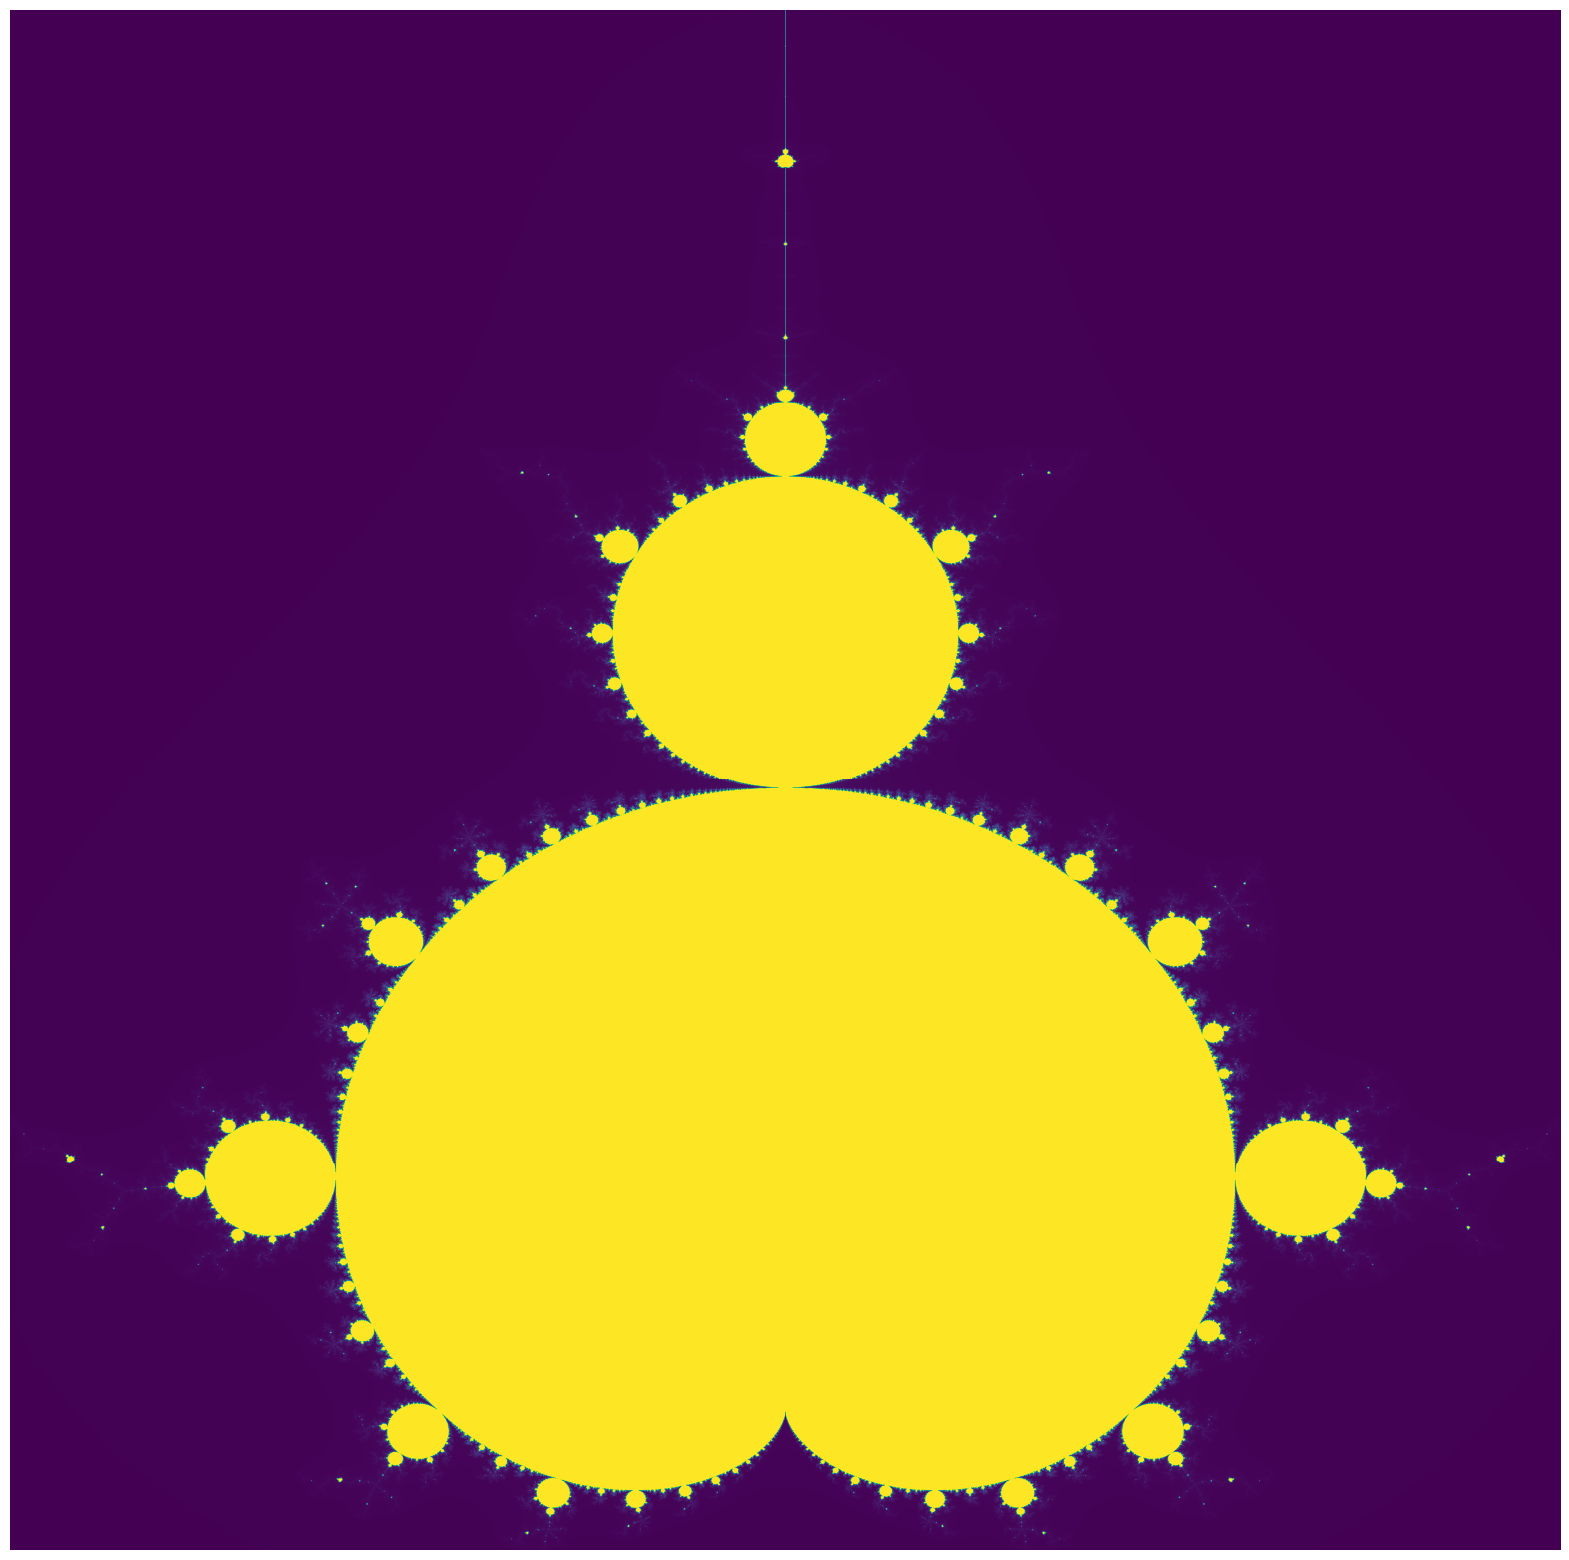

In [177]:
dir_path = os.path.abspath('')+'\\segments\\'

# Example usage:
file_list = ['matrix1.csv', 'matrix2.csv', 'matrix3.csv', 'matrix4.csv', 'matrix5.csv', 'matrix6.csv', 'matrix7.csv', 'matrix8.csv', 'matrix9.csv', 'matrix10.csv', 'matrix11.csv', 'matrix12.csv', 'matrix13.csv', 'matrix14.csv', 'matrix15.csv', 'matrix16.csv']  # Example list of file names
file_list = [os.path.join(dir_path, filename) for filename in file_list]

splits = 4
#file_list = sorted(generate_file_list(dir_path, splits**2))

max_val = max_iteration
max_val = height

plot_matrices_from_files(file_list, max_val, nrows=splits, ncols=splits)
#plot_matrices_from_files(file_list, max_val, nrows=1, ncols=2)

#row_plot(file_list, max_val)

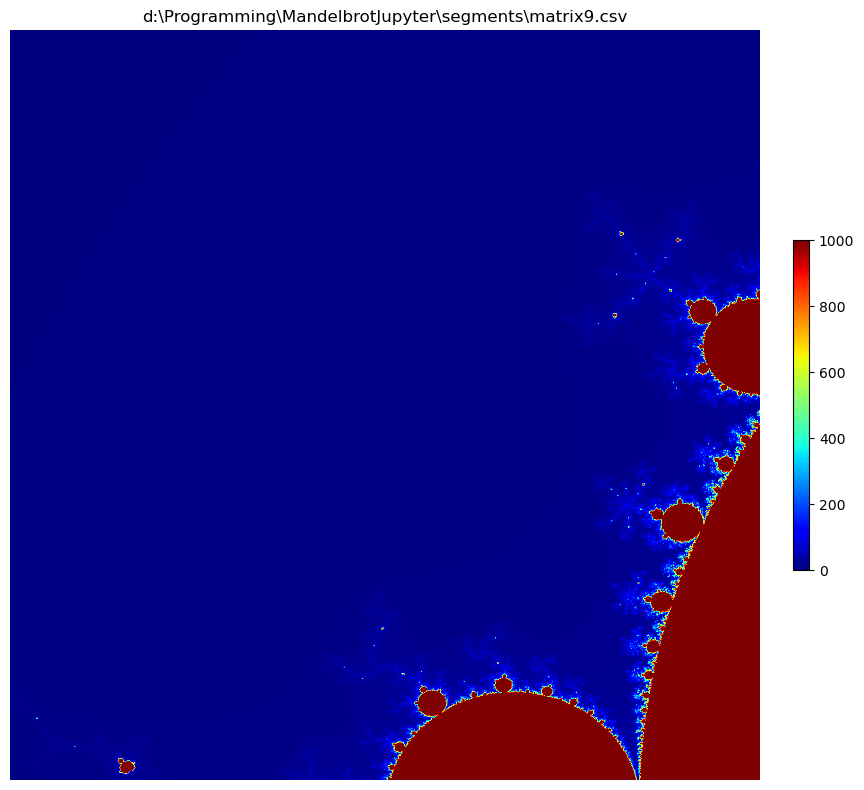

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

file = dir_path + 'matrix9.csv'
matrix = np.loadtxt(file, delimiter=',')

# Get the 'viridis' colormap
cmap_viridis = plt.get_cmap('jet')
# Create a custom colormap with 1000 colors
cmap_custom = LinearSegmentedColormap.from_list('custom_cmap', cmap_viridis(np.linspace(0, 1, max_val)))

im = ax.imshow(matrix, cmap=cmap_custom, vmin=0, vmax=max_val)  # Adjust cmap as needed
ax.set_title(file)
ax.axis('off')
        
# Create colorbar next to the subplot axis
cbar = plt.colorbar(im, ax=ax, fraction=0.02, pad=0.04)

# Adjust layout to make room for colorbars
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()